In [1]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
data, fs = sf.read("dolphinsound.wav")
ch1 = data[:,0]
ch1.shape

(40320000,)

In [7]:
start_time = (6*60+5)
end_time = (6*60+25)
sample_time_series = ch1[fs*start_time:fs*end_time]

In [8]:
f,t,z = scipy.signal.stft(sample_time_series, fs=fs, window='hann', nperseg=1024, 
                      noverlap=int(1024*.5), nfft=None, boundary=None,
                      padded=False)

In [5]:
psd = 20*np.log10(abs(z)**2)+211
psd.shape
np.max(psd)

159.97026062297883

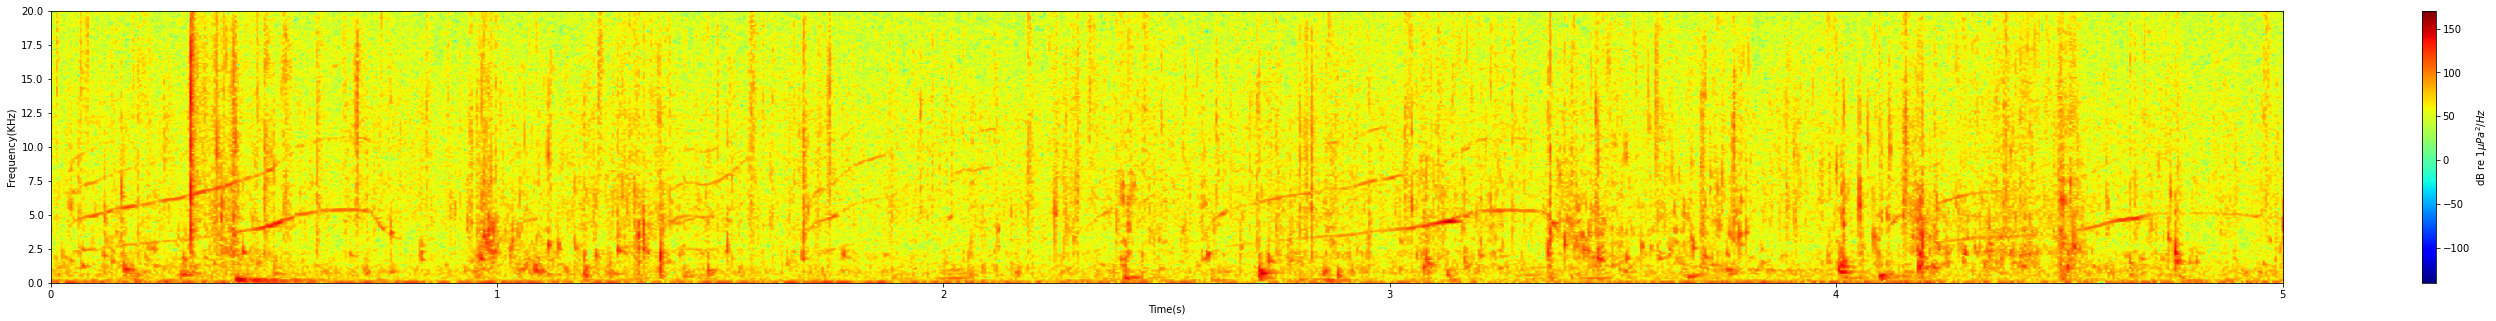

In [9]:
fs = 96000
plt.rcParams['figure.figsize'] = [50, 5]
fig, ax = plt.subplots()
im = ax.imshow(psd, cmap='jet', vmin=-140, vmax=170,  origin='lower', aspect='auto', 
               interpolation='hanning', extent=(0, 5, 0, fs//2/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
c_bar.set_label("dB re 1" + r'$\mu Pa^{2}/Hz$')
plt.show()